## About Dataset
Methane emissions estimates for Functional Urban Areas (FUAs) from Schiavina et al. (2019) provide information linking grid cells in the World Bank’s global XCH4 database to IDs for FUAs and national administrative units.

The database uses information from the European Space Agency’s Sentinel-5P (S-5P) (TROPOMI) satellite platform. It downloads monthly updates for georeferenced measures of XCH4—the column-averaged, dry-air mole fraction of the gas—and filters the data for atmospheric concentration anomalies that identify local emissions. The filter uses the methodology of Hakkarainen et al. (2019). See Dasgupta, Lall, and Wheeler (2023) for a detailed description.

## Column Description
1. **id5** - Cell ID  
2. **x** - Centroid_x  
3. **y** - Centroid_y  
4. **terr5** - Terrestrial Cell Identifier  
5. **mean_ch4** - Monthly Mean Bias-Corrected XCH4  
6. **mean_ch4_anomaly** - Monthly Mean Bias-Corrected XCH4 Anomaly  
7. **year** - Year column  
8. **month** - Month column  
9. **fua_id** - Identifier of Functional Urban Area from Schiavina et al.  
10. **max_coverage_fraction** - Share of area of grid in FUA  
11. **eFUA_name** - Name of Functional Urban Area from Schiavina et al.  
12. **Cntry_ISO** - Country ISO from Schiavina et al.  
13. **Cntry_name** - Country name from Schiavina et al.  
14. **FUA_p_2015** - Population of Functional Urban Area from Schiavina et al.  

## Summary
Here, we first merged the dataset for the years 2019-2022 and processed the merged output. We then checked for outliers and null values, but no issues were found, as the dataset was already in a standard format. The dataset was grouped for analysis in India since the dataset is global. Due to the large number of rows and for better analysis, sampling was done. 

Next, seasonality and stationarity checks were performed through visual inspection and the Augmented Dickey-Fuller (ADF) test, which initially indicated non-stationarity. The series was then made stationary through differencing.

Afterward, our sampled dataset was ready for modeling, and ARIMA was applied. The forecasted values for the period between 1910-1950 (monthly mean bias-corrected XCH4) were quite close to the initial mean XCH4 values, indicating that there is not much increase or decrease if the conditions remain ideal.


# Load the dataset and check for preprocessing required

In [1]:
import pandas as pd
df=pd.read_csv(r"merged_output.csv")
df

,id5,x,y,terr5,mean_ch4,mean_ch4_anomaly,year,month,fua_id,max_coverage_fraction,eFUA_name,Cntry_ISO,Cntry_name,FUA_p_2015
0,10002332,-103.425,20.525,1,1841.816406,-6.005853,2019,4,6121,1.000000,Dechang,CHN,China,89159.773990
1,10002333,-103.375,20.525,1,1845.382568,-7.844730,2019,3,6121,1.000000,Dechang,CHN,China,89159.773990
2,10002333,-103.375,20.525,1,1849.486694,-4.251874,2019,4,6121,1.000000,Dechang,CHN,China,89159.773990
3,10002333,-103.375,20.525,1,1854.499512,8.238812,2019,6,6121,1.000000,Dechang,CHN,China,89159.773990
4,10002334,-103.325,20.525,1,1840.573975,-12.326856,2019,4,6121,1.000000,Dechang,CHN,China,89159.773990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249406,9999122,96.075,20.575,1,1915.998413,28.223059,2022,2,6385,0.515133,Kyzyl,RUS,Russia,116962.230165
1249407,9999122,96.075,20.575,1,1903.668091,23.111134,2022,4,6385,0.515133,Kyzyl,RUS,Russia,116962.230165
1249408,9999122,96.075,20.575,1,1940.895386,36.428696,2022,11,6385,0.515133,Kyzyl,RUS,Russia,116962.230165
1249409,9999122,96.075,20.575,1,1911.998779,23.195463,2022,3,6385,0.515133,Kyzyl,RUS,Russia,116962.230165


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249411 entries, 0 to 1249410
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id5                    1249411 non-null  int64  
 1   x                      1249411 non-null  float64
 2   y                      1249411 non-null  float64
 3   terr5                  1249411 non-null  int64  
 4   mean_ch4               1249411 non-null  float64
 5   mean_ch4_anomaly       1249411 non-null  float64
 6   year                   1249411 non-null  int64  
 7   month                  1249411 non-null  int64  
 8   fua_id                 1249411 non-null  int64  
 9   max_coverage_fraction  1249411 non-null  float64
 10  eFUA_name              1249411 non-null  object 
 11  Cntry_ISO              1249411 non-null  object 
 12  Cntry_name             1249411 non-null  object 
 13  FUA_p_2015             1249411 non-null  float64
dtypes: float64(6), int

In [3]:
df.isna().sum()

id5                      0
x                        0
y                        0
terr5                    0
mean_ch4                 0
mean_ch4_anomaly         0
year                     0
month                    0
fua_id                   0
max_coverage_fraction    0
eFUA_name                0
Cntry_ISO                0
Cntry_name               0
FUA_p_2015               0
dtype: int64

In [4]:
df.describe

<bound method NDFrame.describe of               id5        x       y  terr5     mean_ch4  mean_ch4_anomaly  \
0        10002332 -103.425  20.525      1  1841.816406         -6.005853   
1        10002333 -103.375  20.525      1  1845.382568         -7.844730   
2        10002333 -103.375  20.525      1  1849.486694         -4.251874   
3        10002333 -103.375  20.525      1  1854.499512          8.238812   
4        10002334 -103.325  20.525      1  1840.573975        -12.326856   
...           ...      ...     ...    ...          ...               ...   
1249406   9999122   96.075  20.575      1  1915.998413         28.223059   
1249407   9999122   96.075  20.575      1  1903.668091         23.111134   
1249408   9999122   96.075  20.575      1  1940.895386         36.428696   
1249409   9999122   96.075  20.575      1  1911.998779         23.195463   
1249410   9999122   96.075  20.575      1  1917.451660         29.974804   

         year  month  fua_id  max_coverage_fraction e

In [5]:
df['Cntry_name'].unique()

array(['China', 'Nigeria', 'Mexico', 'Colombia', 'Vietnam', 'Brazil',
       'Egypt', 'Bangladesh', 'Indonesia', 'Ghana', 'Germany', 'Ethiopia',
       'India', 'Iran', 'Spain', 'Chad', 'Russia', 'NorthKorea', 'Turkey',
       'UnitedStates', 'Italy', 'Morocco', 'DemocraticRepublicoftheCongo',
       'Cuba', 'Ukraine', 'Pakistan', 'Myanmar', 'Sudan', 'Guatemala',
       'UnitedKingdom', 'Japan', 'Iraq', 'Philippines', 'Argentina',
       'Algeria', 'Venezuela', 'SouthAfrica', 'Thailand', 'Uzbekistan',
       'Cameroon', 'France', 'Ecuador', 'ElSalvador', 'Mauritania',
       'SouthKorea', 'Nicaragua', 'Malawi', 'Malaysia', 'Romania',
       'DominicanRepublic', 'Kazakhstan', 'Angola', 'Zambia', 'Peru',
       'Bolivia', 'Botswana', 'CentralAfricanRepublic', 'Afghanistan',
       'Chile', 'Kenya', 'UnitedArabEmirates', 'Sweden', 'CotedIvoire',
       'Reunion', 'Serbia', 'Niger', 'NewZealand', 'Georgia', 'Slovakia',
       'Portugal', 'Jordan', 'Israel', 'Hungary', 'Greece', 'Austria',


# Analysis routed on methane emissions prediction in India

In [6]:
grouped = df.groupby('Cntry_name')

In [7]:
grouped

In [8]:
india_df=grouped.get_group('India')
india_df

,id5,x,y,terr5,mean_ch4,mean_ch4_anomaly,year,month,fua_id,max_coverage_fraction,eFUA_name,Cntry_ISO,Cntry_name,FUA_p_2015
218,10042520,105.975,20.275,1,1921.557739,48.162109,2019,11,8872,0.998915,Mahmudabad,IND,India,161833.789100
238,10049720,105.975,20.225,1,1921.443359,48.047729,2019,11,8872,1.000000,Mahmudabad,IND,India,161833.789100
239,10049720,105.975,20.225,1,1916.791504,39.993713,2019,12,8872,1.000000,Mahmudabad,IND,India,161833.789100
240,10049721,106.025,20.225,1,1918.459717,54.152344,2019,12,8872,0.937196,Mahmudabad,IND,India,161833.789100
263,10064123,106.125,20.125,1,1930.068359,56.851074,2019,12,8878,0.744843,Bindki,IND,India,181957.396500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248859,9980696,-105.225,20.675,1,1909.145996,17.181530,2022,1,6113,1.000000,Talaja,IND,India,61354.575790
1248860,9980696,-105.225,20.675,1,1898.551758,15.424502,2022,2,6113,1.000000,Talaja,IND,India,61354.575790
1248861,9980696,-105.225,20.675,1,1941.764648,40.318535,2022,10,6113,1.000000,Talaja,IND,India,61354.575790
1248862,9980696,-105.225,20.675,1,1885.128906,-8.770246,2022,3,6113,1.000000,Talaja,IND,India,61354.575790


In [9]:
india_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320151 entries, 218 to 1249043
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id5                    320151 non-null  int64  
 1   x                      320151 non-null  float64
 2   y                      320151 non-null  float64
 3   terr5                  320151 non-null  int64  
 4   mean_ch4               320151 non-null  float64
 5   mean_ch4_anomaly       320151 non-null  float64
 6   year                   320151 non-null  int64  
 7   month                  320151 non-null  int64  
 8   fua_id                 320151 non-null  int64  
 9   max_coverage_fraction  320151 non-null  float64
 10  eFUA_name              320151 non-null  object 
 11  Cntry_ISO              320151 non-null  object 
 12  Cntry_name             320151 non-null  object 
 13  FUA_p_2015             320151 non-null  float64
dtypes: float64(6), int64(5), object(3

In [10]:
india_df['date']=india_df['year'].astype(str)+"-"+india_df['month'].astype(str)
india_df

C:\Users\Dell\AppData\Local\Temp\ipykernel_2348\2326314811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_df['date']=india_df['year'].astype(str)+"-"+india_df['month'].astype(str)


,id5,x,y,terr5,mean_ch4,mean_ch4_anomaly,year,month,fua_id,max_coverage_fraction,eFUA_name,Cntry_ISO,Cntry_name,FUA_p_2015,date
218,10042520,105.975,20.275,1,1921.557739,48.162109,2019,11,8872,0.998915,Mahmudabad,IND,India,161833.789100,2019-11
238,10049720,105.975,20.225,1,1921.443359,48.047729,2019,11,8872,1.000000,Mahmudabad,IND,India,161833.789100,2019-11
239,10049720,105.975,20.225,1,1916.791504,39.993713,2019,12,8872,1.000000,Mahmudabad,IND,India,161833.789100,2019-12
240,10049721,106.025,20.225,1,1918.459717,54.152344,2019,12,8872,0.937196,Mahmudabad,IND,India,161833.789100,2019-12
263,10064123,106.125,20.125,1,1930.068359,56.851074,2019,12,8878,0.744843,Bindki,IND,India,181957.396500,2019-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248859,9980696,-105.225,20.675,1,1909.145996,17.181530,2022,1,6113,1.000000,Talaja,IND,India,61354.575790,2022-1
1248860,9980696,-105.225,20.675,1,1898.551758,15.424502,2022,2,6113,1.000000,Talaja,IND,India,61354.575790,2022-2
1248861,9980696,-105.225,20.675,1,1941.764648,40.318535,2022,10,6113,1.000000,Talaja,IND,India,61354.575790,2022-10
1248862,9980696,-105.225,20.675,1,1885.128906,-8.770246,2022,3,6113,1.000000,Talaja,IND,India,61354.575790,2022-3


In [11]:
india_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320151 entries, 218 to 1249043
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id5                    320151 non-null  int64  
 1   x                      320151 non-null  float64
 2   y                      320151 non-null  float64
 3   terr5                  320151 non-null  int64  
 4   mean_ch4               320151 non-null  float64
 5   mean_ch4_anomaly       320151 non-null  float64
 6   year                   320151 non-null  int64  
 7   month                  320151 non-null  int64  
 8   fua_id                 320151 non-null  int64  
 9   max_coverage_fraction  320151 non-null  float64
 10  eFUA_name              320151 non-null  object 
 11  Cntry_ISO              320151 non-null  object 
 12  Cntry_name             320151 non-null  object 
 13  FUA_p_2015             320151 non-null  float64
 14  date                   320151 non

In [12]:
india_df['date']=pd.to_datetime(india_df['date'])
india_df.info()

C:\Users\Dell\AppData\Local\Temp\ipykernel_2348\617732087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_df['date']=pd.to_datetime(india_df['date'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 320151 entries, 218 to 1249043
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id5                    320151 non-null  int64         
 1   x                      320151 non-null  float64       
 2   y                      320151 non-null  float64       
 3   terr5                  320151 non-null  int64         
 4   mean_ch4               320151 non-null  float64       
 5   mean_ch4_anomaly       320151 non-null  float64       
 6   year                   320151 non-null  int64         
 7   month                  320151 non-null  int64         
 8   fua_id                 320151 non-null  int64         
 9   max_coverage_fraction  320151 non-null  float64       
 10  eFUA_name              320151 non-null  object        
 11  Cntry_ISO              320151 non-null  object        
 12  Cntry_name             320151 non-null  o

In [13]:
india_df

,id5,x,y,terr5,mean_ch4,mean_ch4_anomaly,year,month,fua_id,max_coverage_fraction,eFUA_name,Cntry_ISO,Cntry_name,FUA_p_2015,date
218,10042520,105.975,20.275,1,1921.557739,48.162109,2019,11,8872,0.998915,Mahmudabad,IND,India,161833.789100,2019-11-01
238,10049720,105.975,20.225,1,1921.443359,48.047729,2019,11,8872,1.000000,Mahmudabad,IND,India,161833.789100,2019-11-01
239,10049720,105.975,20.225,1,1916.791504,39.993713,2019,12,8872,1.000000,Mahmudabad,IND,India,161833.789100,2019-12-01
240,10049721,106.025,20.225,1,1918.459717,54.152344,2019,12,8872,0.937196,Mahmudabad,IND,India,161833.789100,2019-12-01
263,10064123,106.125,20.125,1,1930.068359,56.851074,2019,12,8878,0.744843,Bindki,IND,India,181957.396500,2019-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248859,9980696,-105.225,20.675,1,1909.145996,17.181530,2022,1,6113,1.000000,Talaja,IND,India,61354.575790,2022-01-01
1248860,9980696,-105.225,20.675,1,1898.551758,15.424502,2022,2,6113,1.000000,Talaja,IND,India,61354.575790,2022-02-01
1248861,9980696,-105.225,20.675,1,1941.764648,40.318535,2022,10,6113,1.000000,Talaja,IND,India,61354.575790,2022-10-01
1248862,9980696,-105.225,20.675,1,1885.128906,-8.770246,2022,3,6113,1.000000,Talaja,IND,India,61354.575790,2022-03-01


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

# 2. Find out seasonality in time series dataset

### Seasonality in Time Series

Seasonality refers to regular, repeating patterns or cycles in a time series that occur at fixed intervals, typically driven by external factors such as weather, holidays, or economic cycles. It is a crucial feature to understand and account for in time series analysis and forecasting.


### Detecting Seasonality
1. Visualization: Plotting the time series can reveal repeating cycles.
2. Autocorrelation Function (ACF): Peaks at lags corresponding to the seasonality period indicate its presence.



Text(0, 0.5, 'ch4')

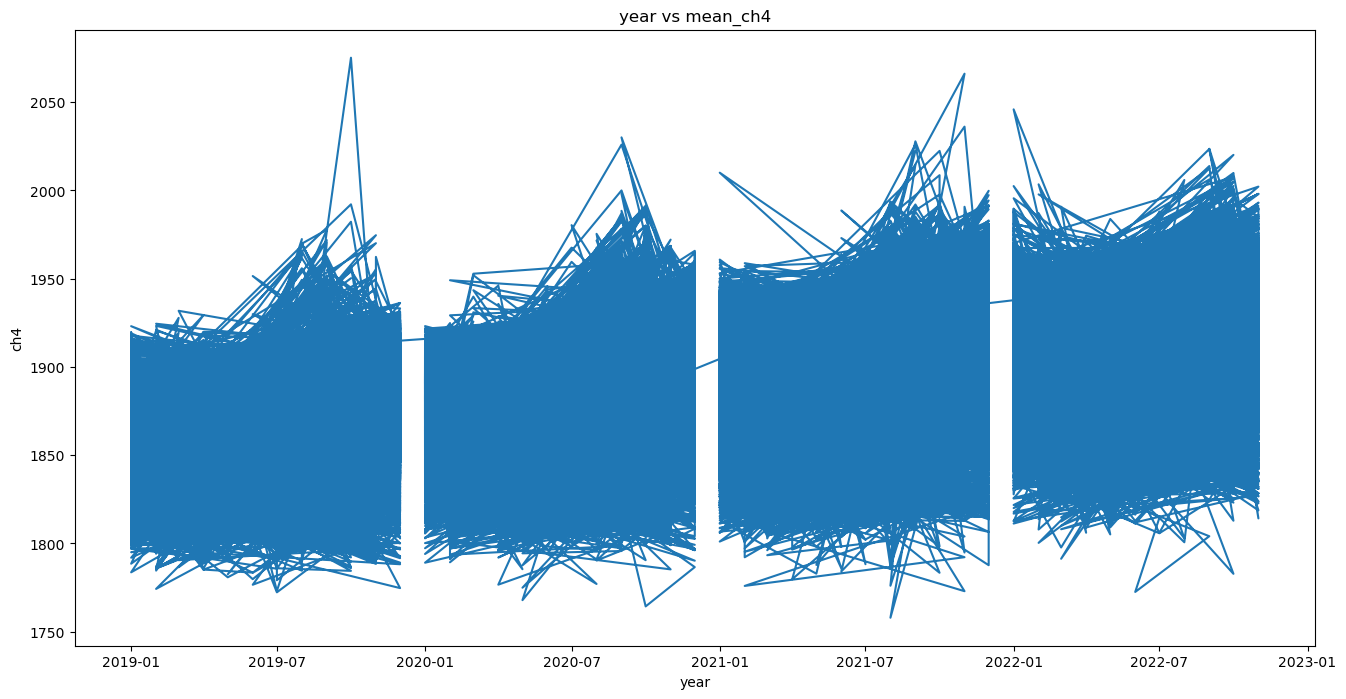

In [15]:
 plt.figure(figsize=(16, 8)) # Adjust the size as needed

# Plot and customize in one go
plt.plot(india_df['date'], india_df['mean_ch4'])
plt.title('year vs mean_ch4')
plt.xlabel('year')
plt.ylabel('ch4')

In [19]:
india_df['Year'] = pd.to_datetime(india_df['date']).dt.year
india_df.info()

C:\Users\Dell\AppData\Local\Temp\ipykernel_2348\2732659256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_df['Year'] = pd.to_datetime(india_df['date']).dt.year


<class 'pandas.core.frame.DataFrame'>
Int64Index: 320151 entries, 218 to 1249043
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id5                    320151 non-null  int64         
 1   x                      320151 non-null  float64       
 2   y                      320151 non-null  float64       
 3   terr5                  320151 non-null  int64         
 4   mean_ch4               320151 non-null  float64       
 5   mean_ch4_anomaly       320151 non-null  float64       
 6   year                   320151 non-null  int64         
 7   month                  320151 non-null  int64         
 8   fua_id                 320151 non-null  int64         
 9   max_coverage_fraction  320151 non-null  float64       
 10  eFUA_name              320151 non-null  object        
 11  Cntry_ISO              320151 non-null  object        
 12  Cntry_name             320151 non-null  o

# Sampling for better analysis 
Taking samples after every 5000 th row

In [20]:
d1=india_df['Year'].iloc[::5000][:100000]
f1=india_df['mean_ch4'].iloc[::5000][:100000]

In [21]:
print(d1)

218        2019
24423      2019
53335      2019
71403      2019
84651      2019
           ... 
1154277    2022
1164796    2022
1189037    2022
1205916    2022
1248188    2022
Name: Year, Length: 65, dtype: int64


In [22]:
print(f1)

218        1921.557739
24423      1852.367432
53335      1844.082520
71403      1832.364380
84651      1874.841431
              ...     
1154277    1891.937012
1164796    1948.448486
1189037    1928.275635
1205916    1890.507690
1248188    1967.863647
Name: mean_ch4, Length: 65, dtype: float64


Text(0, 0.5, 'ch4')

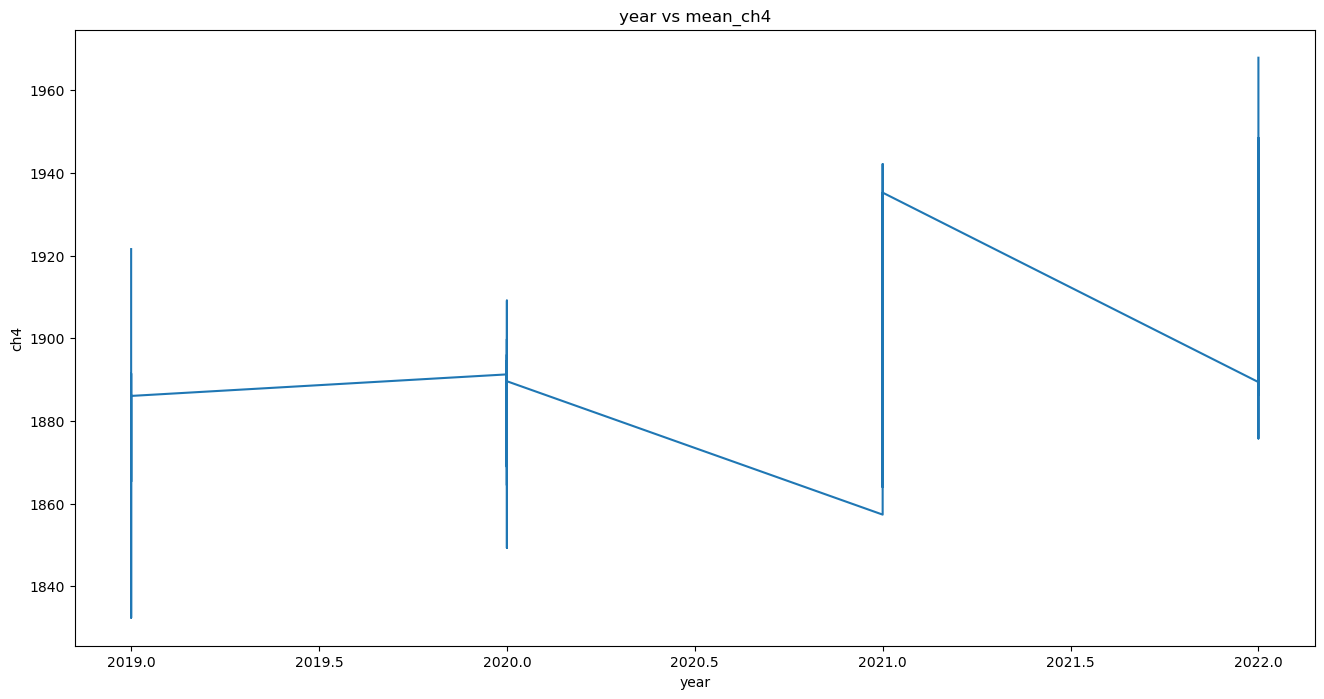

In [55]:
plt.figure(figsize=(16, 8)) # Adjust the size as needed

# Plot and customize in one go
plt.plot(d1,f1)
plt.title('year vs mean_ch4')
plt.xlabel('year')
plt.ylabel('ch4')


In [27]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [30]:
x=f1.values
x

array([1921.557739  , 1852.367432  , 1844.08252   , 1832.36438   ,
       1874.841431  , 1880.579712  , 1891.463135  , 1865.289307  ,
       1886.030396  , 1891.24182129, 1864.4152832 , 1875.72717285,
       1896.02355957, 1890.89672852, 1894.5703125 , 1878.54956055,
       1868.82617188, 1899.76672363, 1892.34216309, 1869.03930664,
       1909.10632324, 1849.24926758, 1889.58337402, 1857.31201172,
       1868.86450195, 1879.02734375, 1871.40820312, 1866.45227051,
       1930.74316406, 1913.18359375, 1875.57189941, 1871.95568848,
       1887.3848877 , 1894.81982422, 1909.88269043, 1863.95361328,
       1866.07275391, 1942.12011719, 1932.66442871, 1917.74328613,
       1878.98034668, 1891.63623047, 1916.80297852, 1935.2253418 ,
       1889.37866211, 1875.73266602, 1888.0168457 , 1904.95214844,
       1886.36474609, 1908.77246094, 1911.13977051, 1894.16137695,
       1907.43981934, 1912.97045898, 1889.7857666 , 1894.33154297,
       1901.05761719, 1909.65258789, 1913.0279541 , 1898.86621

# 1.  Implement augmented dickey fuller test (ADF)

###  Augmented Dickey-Fuller (ADF) Test in Time Series

The Augmented Dickey-Fuller (ADF) Test is a statistical test used to determine whether a time series is **stationary**, which means its statistical properties (mean, variance, autocorrelation) remain constant over time. Stationarity is a critical assumption for many time series models, such as ARIMA.



###  Purpose of the ADF Test

The ADF test helps identify the presence of a **unit root** in a time series. A unit root indicates that the series is non-stationary and exhibits a stochastic trend. If the test concludes that there is no unit root, the series can be treated as stationary.



### Key Components of the ADF Test

1. **Null Hypothesis (\(H_0\))**:
   - The series has a unit root (i.e., it is non-stationary).

2. **Alternative Hypothesis (\(H_a\))**:
   - The series does not have a unit root (i.e., it is stationary).

3. **Test Statistic**:
   - The ADF test calculates a test statistic and compares it to critical values from the Dickey-Fuller distribution.



### Interpreting ADF Test Results

1. **P-Value Approach**:
   - If the p-value is less than the chosen significance level (e.g., 0.05), reject \(H_0\): the series is stationary.
   - If the p-value is greater, fail to reject \(H_0\): the series is non-stationary.

2. **Critical Value Comparison**:
   - Compare the test statistic with the critical values. If the test statistic is more negative than the critical value, reject \(H_0\).


In [31]:
#Augmented dickey fuller test
test_result=adfuller(x)
print('ADF Statistic : %f' % test_result[0])
print('p-value : %f' % test_result[1])

print('Critical Values:')
for key,value in test_result[4].items():
    print('\t%s : %.3f' % (key,value))
    
    
     
if test_result[0] < test_result[4]["5%"]:
    print("Reject Null Hypothesis means given time series is stationary")
else:
    print("Failed to reject Null Hypothesis means given time series is Non-stationary")

ADF Statistic : -1.180644
p-value : 0.681866
Critical Values:
	1% : -3.548
	5% : -2.913
	10% : -2.594
Failed to reject Null Hypothesis means given time series is Non-stationary


# 8. Check for stationarity and making dataset stationary if not using differencing.

### **Stationarity in Time Series**

**Stationarity** refers to a property of a time series where its statistical characteristics, such as mean, variance, and autocorrelation, remain constant over time. Stationary series are crucial in time series analysis because many models, such as ARIMA, assume stationarity to make accurate forecasts.


### **Role of Differencing in Achieving Stationarity**

**Differencing** is a common method to transform a non-stationary series into a stationary one. It involves subtracting the value of a data point from its preceding value:
\[
\Delta y_t = y_t - y_{t-1}
\]

#### **How Differencing Works**
1. **Removes Trends**: Differencing eliminates linear trends by computing changes between consecutive observations.
2. **Stabilizes Variance**: Higher-order differencing (e.g., second differences) can address more complex patterns of non-stationarity.


### **When to Use Differencing**
1. **Dickey-Fuller Test**: If the test indicates non-stationarity, apply differencing.
2. **Visualization**: Examine plots of the series for trends or seasonality.

### **Importance of Differencing**
By achieving stationarity through differencing, time series models can perform better by focusing on the inherent patterns and relationships in the data rather than being misled by trends or changing variability.

In [43]:
# Make the data stationary (differencing)
f2 = f1.diff().fillna(0)

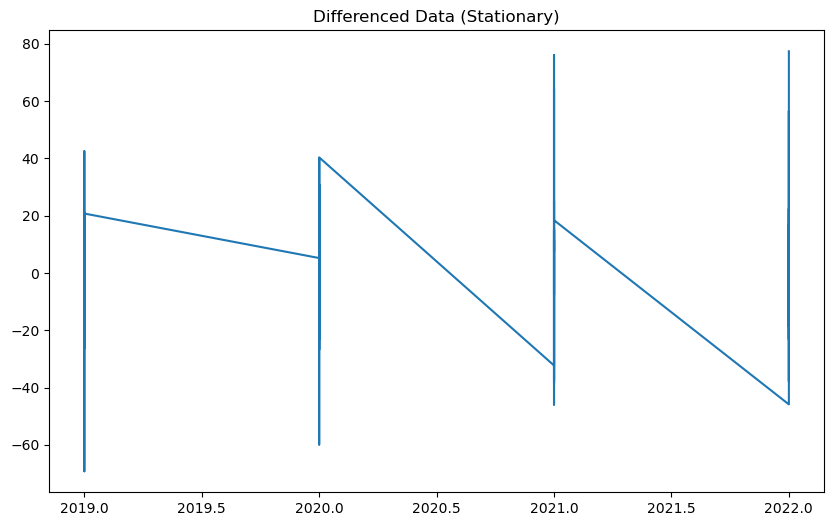

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(d1,f2)
plt.title('Differenced Data (Stationary)')
plt.show()

In [45]:
x1=f2.values
x1

array([  0.        , -69.190307  ,  -8.284912  , -11.71814   ,
        42.477051  ,   5.738281  ,  10.883423  , -26.173828  ,
        20.741089  ,   5.21142529, -26.82653809,  11.31188965,
        20.29638672,  -5.12683105,   3.67358398, -16.02075195,
        -9.72338867,  30.94055176,  -7.42456055, -23.30285645,
        40.0670166 , -59.85705566,  40.33410645, -32.2713623 ,
        11.55249023,  10.1628418 ,  -7.61914062,  -4.95593262,
        64.29089355, -17.55957031, -37.61169434,  -3.61621094,
        15.42919922,   7.43493652,  15.06286621, -45.92907715,
         2.11914062,  76.04736328,  -9.45568848, -14.92114258,
       -38.76293945,  12.65588379,  25.16674805,  18.42236328,
       -45.84667969, -13.64599609,  12.28417969,  16.93530273,
       -18.58740234,  22.40771484,   2.36730957, -16.97839355,
        13.27844238,   5.53063965, -23.18469238,   4.54577637,
         6.72607422,   8.5949707 ,   3.37536621, -14.16174316,
        -6.92919922,  56.51147461, -20.17285156, -37.76

In [46]:
#Augmented dickey fuller test for checking if the dataset is stationary after differencing
test_result=adfuller(x1)
print('ADF Statistic : %f' % test_result[0])
print('p-value : %f' % test_result[1])

print('Critical Values:')
for key,value in test_result[4].items():
    print('\t%s : %.3f' % (key,value))
    
    
     
if test_result[0] < test_result[4]["5%"]:
    print("Reject Null Hypothesis means given time series is stationary")
else:
    print("Failed to reject Null Hypothesis means given time series is Non-stationary")

ADF Statistic : -4.265970
p-value : 0.000509
Critical Values:
	1% : -3.548
	5% : -2.913
	10% : -2.594
Reject Null Hypothesis means given time series is stationary


# 3. Implement ARIMA model for predictions. 

### **ARIMA in Time Series**

**ARIMA (Autoregressive Integrated Moving Average)** is a widely used statistical model for analyzing and forecasting time series data. It combines three key components— AR (Autoregressive), I (Integrated), and MA (Moving Average)—to model time series that may exhibit trends and autocorrelation.


### **Components of ARIMA**

1. **Autoregressive (AR)**:
   - Captures the relationship between a value and its past values (lags).
   - Represented by the parameter ( p ), the number of lagged terms included.

2. **Integrated (I)**:
   - Refers to differencing the data to make it stationary.
   - Represented by the parameter ( d ), the number of times the series is differenced.

3. **Moving Average (MA)**:
   - Captures the relationship between a value and past error terms (residuals).
   - Represented by the parameter ( q ), the number of lagged residuals included.


### **ARIMA Notation**
The ARIMA model is expressed as:
 [ARIMA(p, d, q)]
- ( p ): Number of AR terms.
- ( d ): Degree of differencing.
- ( q ): Number of MA terms.

For example, ( ARIMA(2, 1, 1) ) includes two autoregressive terms, one differencing operation, and one moving average term.

---

### **Steps to Build an ARIMA Model**

1. **Check Stationarity**: 
   - Use visualizations or statistical tests (e.g., ADF test) to ensure stationarity. Apply differencing if needed.

2. **Parameter estimation**:
   - Use auto arima to estimate p,d,q .

3. **Fit the Model**:
   - Train the ARIMA model with chosen parameters.

4. **Evaluate Model**:
   - Use metrics like AIC, BIC, or residual diagnostics to assess model fit.

5. **Forecast**:
   - Use the model to make predictions for future time periods.


In [47]:
!pip install pmdarima

In [48]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [50]:
auto_model = pm.auto_arima(f1, seasonal=False, stepwise=True, suppress_warnings=True)
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   65
Model:               SARIMAX(5, 1, 2)   Log Likelihood                -285.871
Date:                Mon, 02 Dec 2024   AIC                            587.743
Time:                        14:58:59   BIC                            605.014
Sample:                             0   HQIC                           594.547
                                 - 65                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3653      0.186     -7.351      0.000      -1.729      -1.001
ar.L2         -1.8801      0.258     -7.295      0.000      -2.385      -1.375
ar.L3         -1.4737      0.339     -4.345      0.0

In [51]:
p, d, q = auto_model.order

In [53]:
model = ARIMA(f1, order=(p, d, q))
model_fit = model.fit()


C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# 9. Predictions

In [62]:
predictions = model_fit.forecast(steps=65)
predictions

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


65     1938.364689
66     1937.265493
67     1931.082412
68     1919.808613
69     1942.357239
70     1957.583914
71     1918.257343
72     1925.353534
73     1948.271099
74     1933.999845
75     1935.070180
76     1938.323664
77     1924.571935
78     1939.845038
79     1945.913437
80     1925.126818
81     1932.893152
82     1942.640096
83     1931.273469
84     1936.564804
85     1938.156240
86     1928.401806
87     1938.453384
88     1940.581230
89     1928.825380
90     1935.850951
91     1939.130290
92     1931.517604
93     1937.086206
94     1937.132526
95     1930.808119
96     1937.786480
97     1937.791149
98     1931.195313
99     1936.739378
100    1937.112304
101    1932.461843
102    1937.085905
103    1936.202765
104    1932.436540
105    1937.281116
106    1936.325529
107    1932.754466
108    1936.803463
109    1935.999912
110    1933.399442
111    1936.834014
112    1935.586713
113    1933.543541
114    1936.830280
115    1935.579396
116    1933.780981
117    1936.

In [61]:
start_row=1248188
d2=india_df['Year'].iloc[start_row::5000][:10]
d2

Series([], Name: Year, dtype: int64)

# Plotting the initial and predicted values graph for analysing the future results

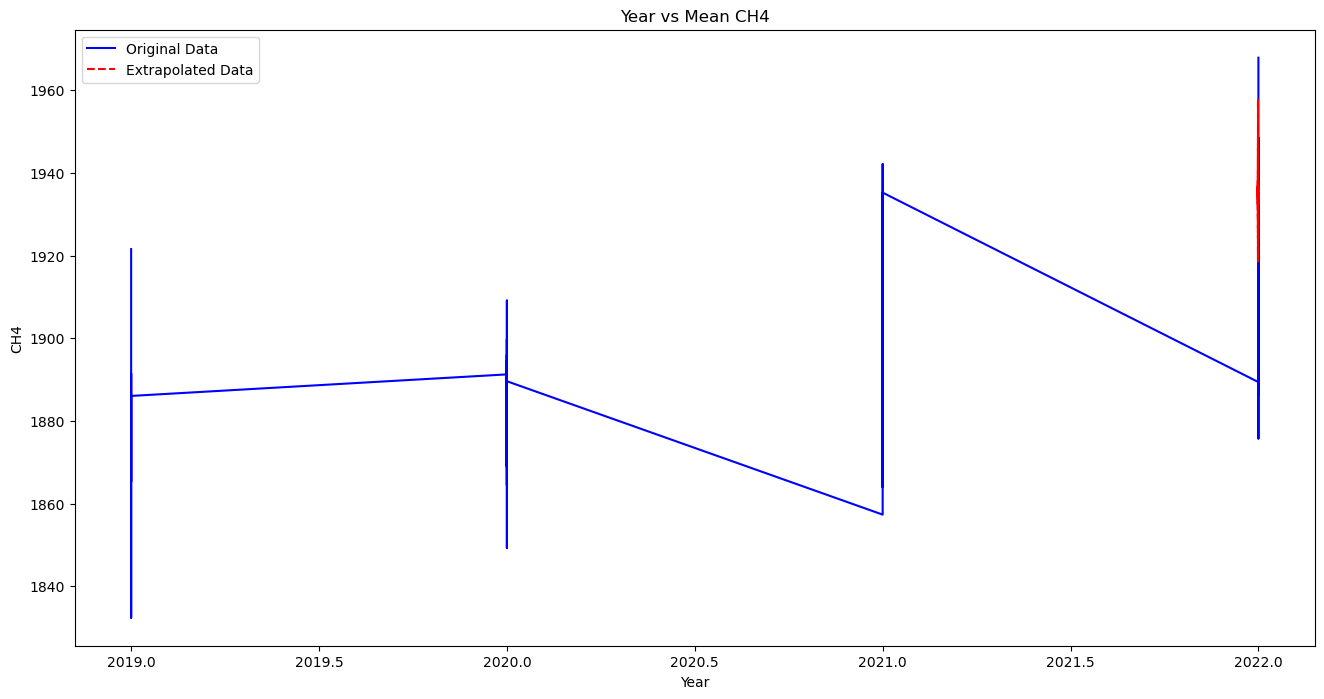

In [67]:
import matplotlib.pyplot as plt



# Generate extrapolated years based on the pattern in d1
# Assuming the same interval as the original data
interval = d1[1] - d1[0]  # Calculate the year interval (e.g., 2005 - 2000 = 5)
d2 = [d1[-1] + (i + 1) * interval for i in range(len(predictions))]

# Plot Configuration
plt.figure(figsize=(16, 8))  # Adjust the size as needed

# Plot the original graph
plt.plot(d1, f1, label='Original Data', color='blue', linestyle='-')

# Plot the extrapolated graph
plt.plot(d2, predictions, label='Extrapolated Data', color='red', linestyle='--')

# Add titles and labels
plt.title('Year vs Mean CH4')
plt.xlabel('Year')
plt.ylabel('CH4')

# Add a legend
plt.legend()

# Show the plot
plt.show()


# Acf and Pacf plots

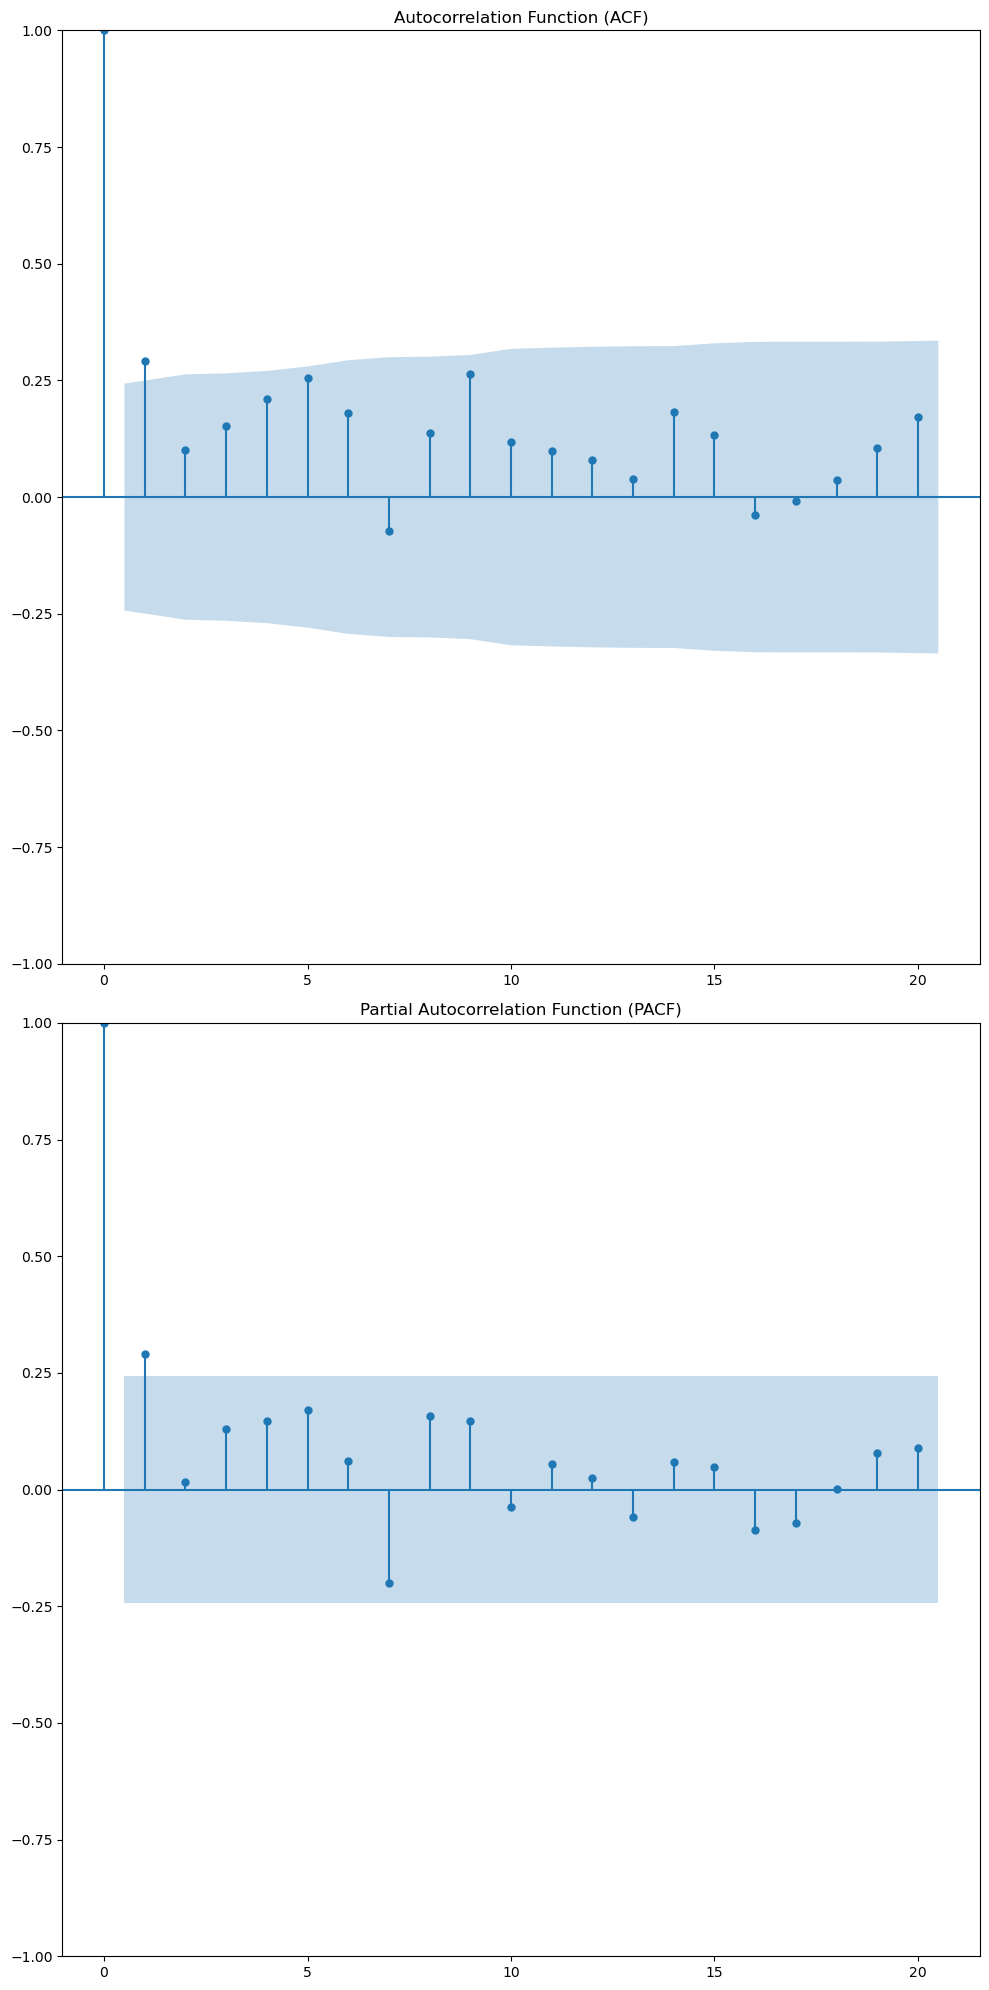

In [68]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a figure with larger vertical size (increase height)
plt.figure(figsize=(10, 20))  

# ACF Plot
plt.subplot(211)
plot_acf(f1, lags=20, ax=plt.gca()) 
plt.title('Autocorrelation Function (ACF)')

# PACF Plot
plt.subplot(212)
plot_pacf(f1, lags=20, ax=plt.gca())  
plt.title('Partial Autocorrelation Function (PACF)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init

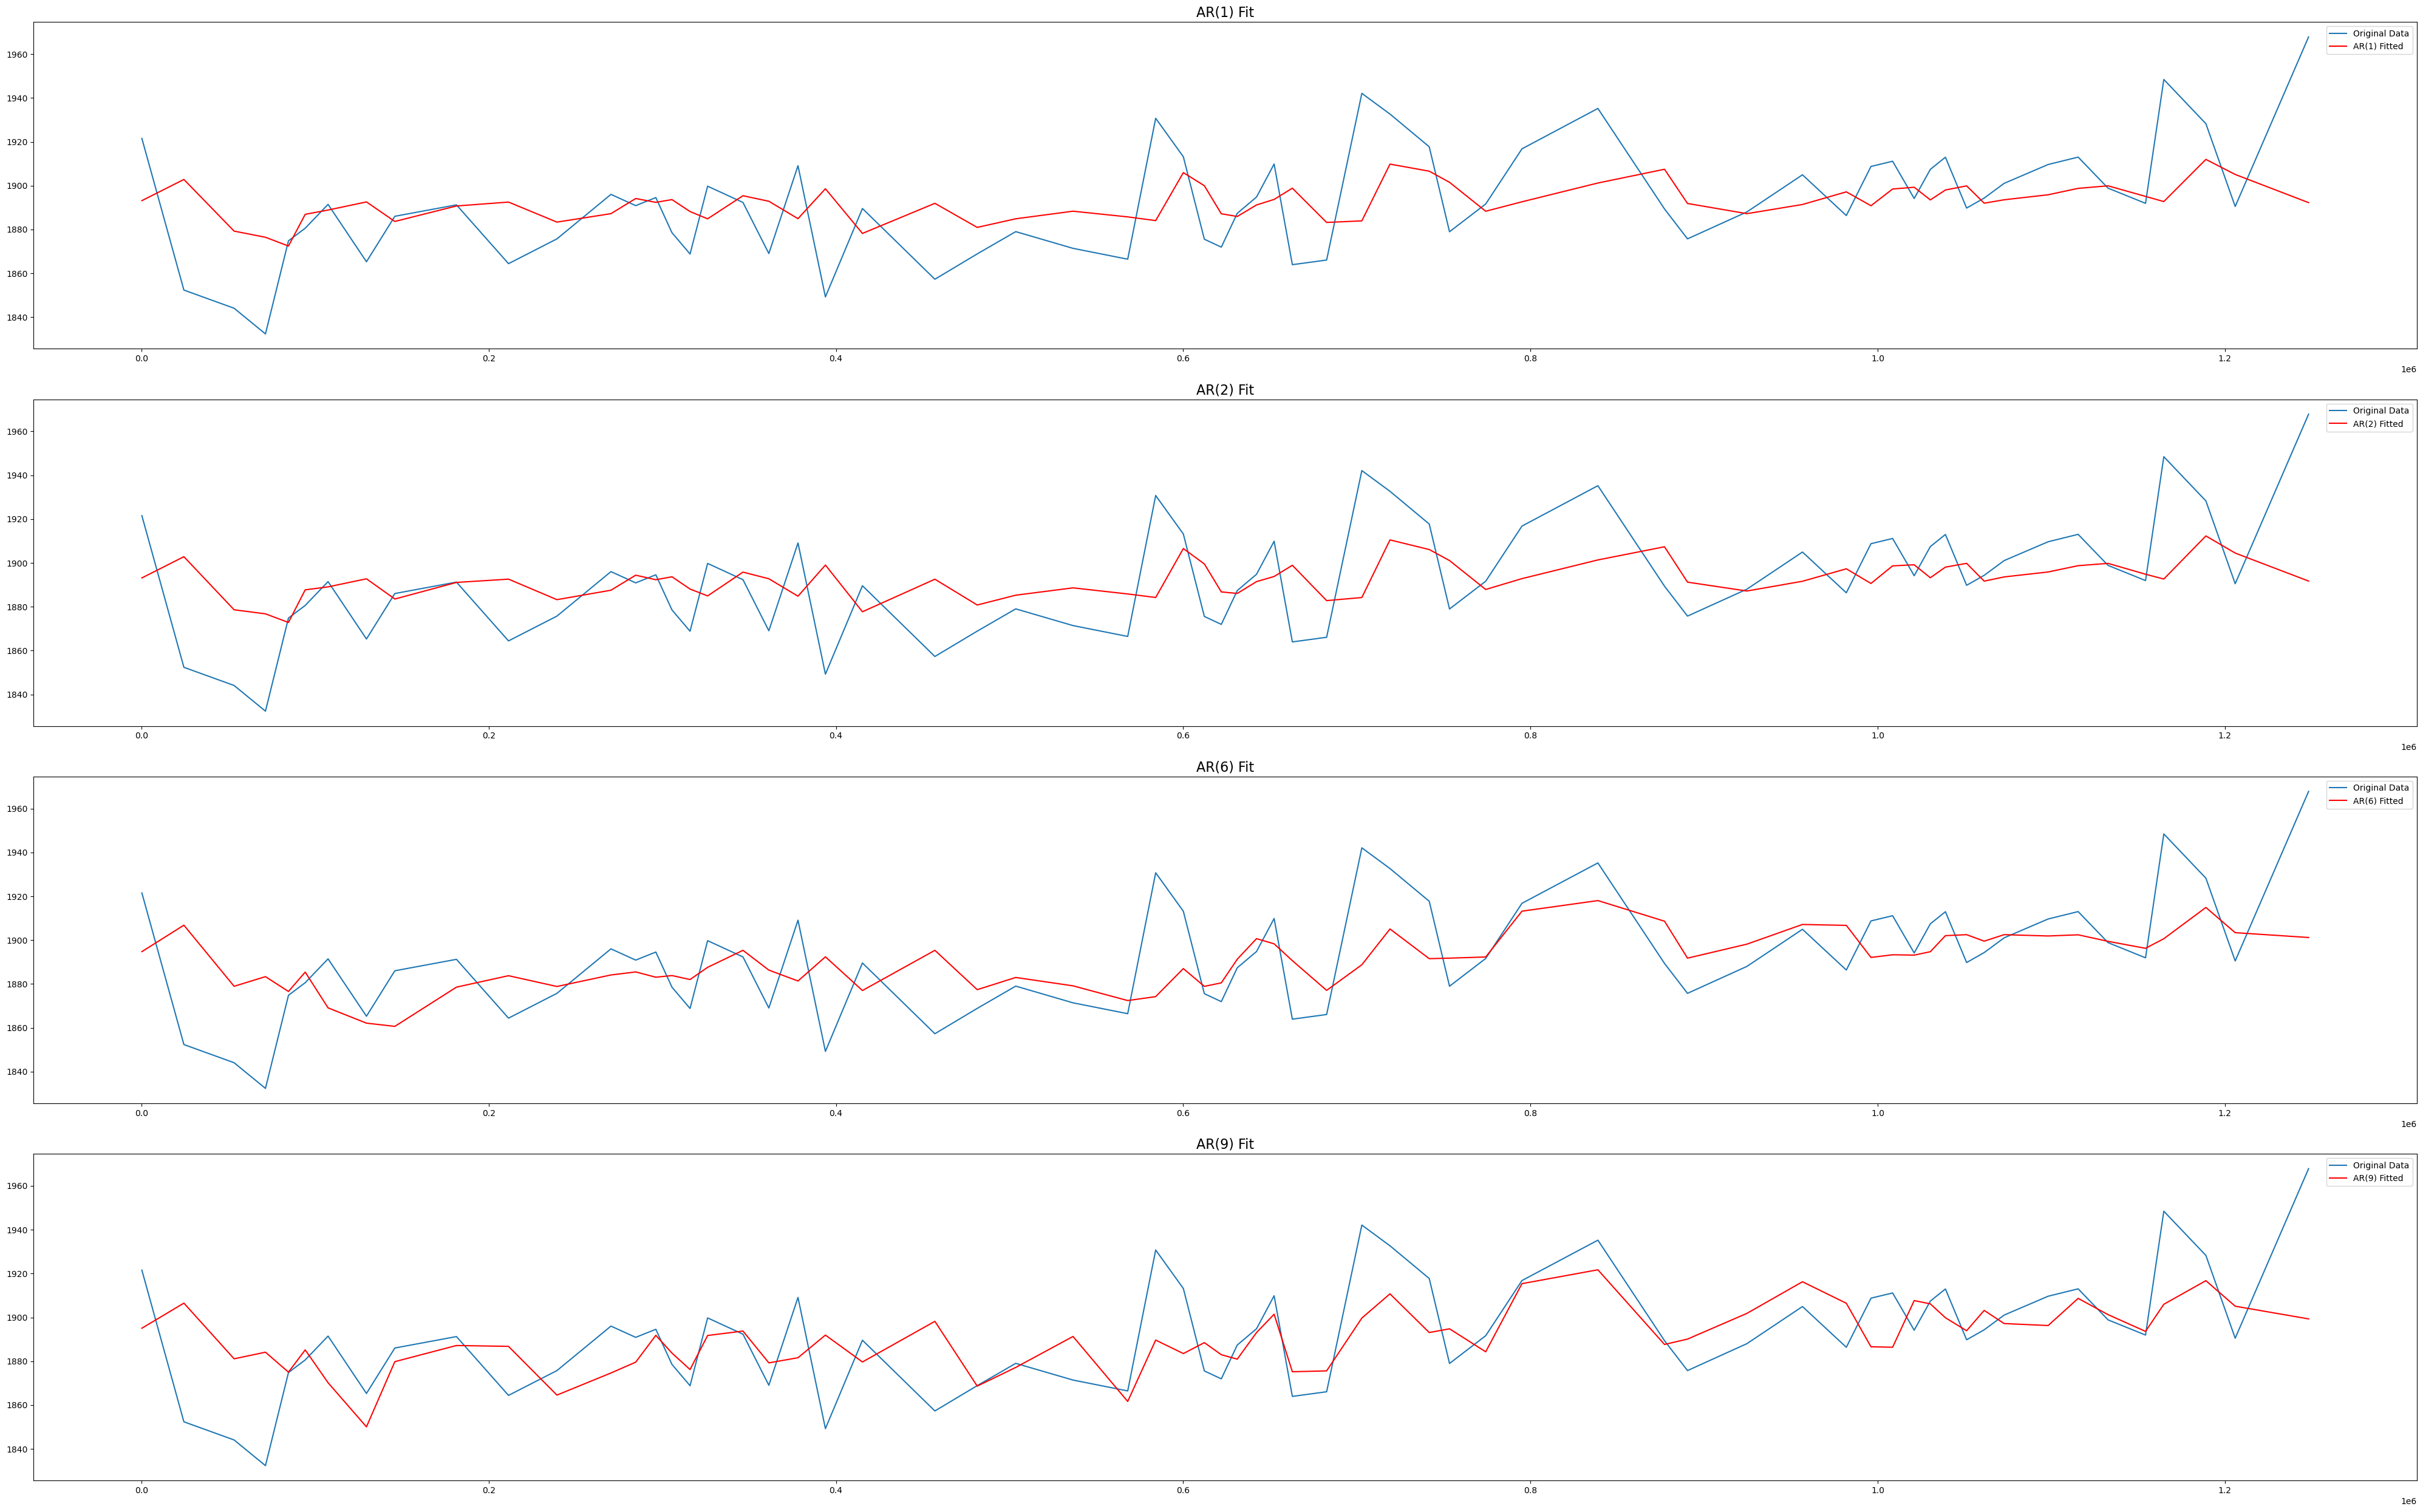

In [70]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA  # Import ARIMA from statsmodels

plt.figure(figsize=(40, 25))

ar_orders = [1, 2, 6, 9]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    # Create AR(p) model using ARIMA with d=0 and q=0
    ar_model = ARIMA(f1, order=(ar_order, 0, 0))  # d=0 for ARMA, q=0 for no moving average
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4, 1, idx + 1)
    plt.plot(f1, label='Original Data')
    plt.plot(ar_model_fit.fittedvalues, label=f'AR({ar_order}) Fitted', color='red')
    plt.title(f'AR({ar_order}) Fit', fontsize=16)
    plt.legend()

plt.tight_layout()
plt.show()

# 4.  Implement Akaike Information Criterion(AIC)


###  Akaike Information Criterion (AIC)

The AIC is designed to evaluate a model's quality based on the likelihood function while penalizing complexity (number of parameters). It is calculated as:
\[
AIC = -2 \ln(L) + 2k
\]
Where:
- \( \ln(L) \): Log-likelihood of the model (how well the model fits the data).
- \( k \): Number of estimated parameters.

**Key Features:**
- Lower AIC values indicate a better-fitting model.
- AIC focuses more on model fit than simplicity, often selecting more complex models.


In [71]:
#AIC comparison
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 603.9965992058519
AIC for AR(2): 605.9853594589281
AIC for AR(6): 605.0780107544947
AIC for AR(9): 603.6417055383271


# 5. Implement Bayesian Information Criterion(BIC)

###  Bayesian Information Criterion (BIC)

The BIC also evaluates model quality but applies a stronger penalty for complexity. It is calculated as:
\[
BIC = -2 \ln(L) + k \ln(n)
\]
Where:
- \( n \): Number of observations in the dataset.

**Key Features:**
- Like AIC, lower BIC values indicate a better model.
- BIC tends to favor simpler models, as the penalty for additional parameters increases with sample size.


In [72]:
#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 610.5197610155388
BIC for AR(2): 614.6829085385107
BIC for AR(6): 622.4731089136598
BIC for AR(9): 627.5599655071791



### **Role of AIC and BIC in Time Series**

1. **Model Selection**:
   - Both criteria are widely used to choose between competing time series models (e.g., ARIMA, SARIMA).
   - They guide the selection of appropriate lag orders and differencing levels.

2. **Trade-off**:
   - AIC prioritizes model fit, which can result in more complex models.
   - BIC prioritizes simplicity, favoring parsimonious models.

3. **Forecasting**:
   - Models selected based on AIC/BIC tend to produce more reliable forecasts by avoiding overfitting or underfitting.

# 6.Implementation of Auto regressive model

### **Autoregressive (AR) Model in Time Series**

An **Autoregressive (AR) model** is a fundamental approach in time series analysis that predicts future values based on a linear combination of past observations. It assumes that the current value of the series depends on its own previous values, making it suitable for data with strong temporal dependencies.




### **Key Characteristics**

1. **Order (( p ))**:
   - Refers to the number of lagged terms included in the model.

2. **Stationarity**:
   - The series must be stationary (mean, variance, and autocorrelation constant over time) for the AR model to work effectively.

3. **Autocorrelation**:
   - The AR model captures the relationship between the series' values and their own lags.


In [79]:
from statsmodels.tsa.ar_model import AutoReg
# Step 4: Fit the AR model
# Choose the lag order (p)
p = 3  # You can determine this using ACF/PACF plots or other methods
model = AutoReg(f1, lags=p) 
model_fit = model.fit()
future_steps = 65 # Number of future time steps
future_dates = d1
predictions = model_fit.forecast(steps=future_steps)

predictions

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fc

65     1926.885990
66     1903.006609
67     1910.422540
68     1906.237405
69     1900.111108
70     1899.497322
71     1898.719705
72     1897.337129
73     1896.769725
74     1896.476050
75     1896.137656
76     1895.925145
77     1895.808556
78     1895.712716
79     1895.644089
80     1895.601954
81     1895.571932
82     1895.550246
83     1895.535943
84     1895.526161
85     1895.519240
86     1895.514524
87     1895.511312
88     1895.509077
89     1895.507538
90     1895.506485
91     1895.505759
92     1895.505258
93     1895.504914
94     1895.504677
95     1895.504514
96     1895.504402
97     1895.504324
98     1895.504271
99     1895.504235
100    1895.504209
101    1895.504192
102    1895.504180
103    1895.504172
104    1895.504166
105    1895.504162
106    1895.504160
107    1895.504158
108    1895.504157
109    1895.504156
110    1895.504155
111    1895.504155
112    1895.504154
113    1895.504154
114    1895.504154
115    1895.504154
116    1895.504154
117    1895.

# 7. Implementation of moving average model

### **Moving Average (MA) Model in Time Series**

A **Moving Average (MA) model** is a time series model that predicts the current value of a series as a linear combination of past error terms (residuals). Unlike the Autoregressive (AR) model, which uses past values of the series, the MA model focuses on the influence of past shocks or noise.


### **Key Characteristics**

1. **Order (( q ))**:
   - Refers to the number of lagged error terms included in the model.

2. **Stationarity**:
   - MA models assume the series is stationary. Preprocessing (e.g., differencing) may be required for non-stationary data.

3. **Short Memory**:
   - The effect of shocks in an MA model dissipates after \( q \) time steps, as the influence of older error terms becomes negligible.


In [80]:
# Step 3: Define the Moving Average
window_size = 5  # You can adjust this value
df['SMA'] = f1.rolling(window=window_size).mean() 

# Step 4: Make Predictions
# For the next value, you can use the last calculated SMA
next_prediction = df['SMA'].iloc[-1]  # This is the last SMA value
print(f"Next predicted value (SMA): {next_prediction}")



Next predicted value (SMA): nan
